# Generate Fidicual Footprint from binary image

Creates a silkscreen footprint with no pads, from a small image. White pixels in the image are silkscreened, and black pixels are left blank.
It's intended that the silkscreen be placed on a dark soldermask. 

In [3]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

[[255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.]
 [255. 255.   0. 255. 255.   0. 255.   0. 255.   0. 255. 255.]
 [255. 255.   0.   0. 255. 255. 255.   0. 255.   0. 255. 255.]
 [255. 255.   0.   0. 255. 255.   0.   0.   0.   0. 255. 255.]
 [255. 255.   0. 255.   0. 255.   0.   0.   0.   0. 255. 255.]
 [255. 255.   0.   0. 255.   0. 255. 255.   0.   0. 255. 255.]
 [255. 255.   0.   0.   0.   0. 255.   0.   0.   0. 255. 255.]
 [255. 255.   0.   0.   0.   0.   0.   0.   0.   0. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]]


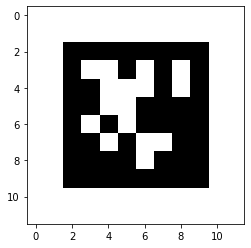

In [23]:
SIZE = 4.1 # mm
BORDER = 1 # px
INPUT_IMAGE = 'TagImages/tag36_11_00000.png'
FOOTPRINT_NAME = 'tag36_11_00000_%.2fmm' % SIZE

image = cv2.imread(INPUT_IMAGE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
w = image.shape[1] + BORDER * 2
h = image.shape[0] + BORDER * 2
borderimage = np.ones((h, w)) * 255
borderimage[BORDER:h-BORDER, BORDER:w-BORDER] = image

plt.figure()
plt.imshow(borderimage, cmap='gray')



In [28]:
import KicadModTree as kmt
kicad_mod = kmt.Footprint(FOOTPRINT_NAME)
kicad_mod.setDescription("Fiducial Tag Silk Screen")

kicad_mod.append(kmt.Text(type="reference", text="", at=[0, -3], layer='F.SilkS'))
kicad_mod.append(kmt.Text(type="value", text="Fiducial", at=[1.5, 3], layer='F.Fab'))

# Size of a pixel
d = SIZE / w

origin = np.array([-d*w/2, -d*h/2])
for row in range(h):
    for col in range(w):
        if borderimage[row, col] < 128: 
            continue
        start = origin + (col * d, row * d)
        end = start + (d, d)
        
        kicad_mod.append(kmt.FilledRect(
            start=start.tolist(),
            end=end.tolist(),
            layer='F.SilkS',
            width=d / 100,
        ))

# output kicad model
file_handler = kmt.KicadFileHandler(kicad_mod)
file_handler.writeFile(FOOTPRINT_NAME + ".kicad_mod")